In [82]:
''' https://www.kaggle.com/datasets/ajayghuge/lok-sabha-general-election-2024-results-india?resource=download '''

' https://www.kaggle.com/datasets/ajayghuge/lok-sabha-general-election-2024-results-india?resource=download '

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df=pd.read_csv(r'C:\Users\HP\Downloads\archive\GE_2024_Results.csv')
df.head()

,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Won
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54,Lost
2,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08,Lost
3,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97,Lost
4,5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09,Lost


In [77]:
# Check columns, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            8902 non-null   int64 
 1   State         8902 non-null   object
 2   Constituency  8902 non-null   object
 3   Candidate     8902 non-null   object
 4   Party         8902 non-null   object
 5   EVM Votes     8902 non-null   object
 6   Postal Votes  8902 non-null   object
 7   Total Votes   8902 non-null   int64 
 8   % of Votes    8902 non-null   object
 9   Result        8902 non-null   object
dtypes: int64(2), object(8)
memory usage: 695.6+ KB


In [78]:
# Summary statistics for numerical columns
df.describe()

,ID,Total Votes
count,8902.000000,8.902000e+03
mean,4451.500000,7.249646e+04
std,2569.930382,1.798988e+05
min,1.000000,0.000000e+00
25%,2226.250000,1.094250e+03
50%,4451.500000,2.781000e+03
75%,6676.750000,9.759500e+03
max,8902.000000,1.471885e+06


In [79]:
# Check unique values in categorical columns
df['State'].unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli and Daman & Diu', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'NCT OF Delhi', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [80]:
df['Party'].unique()

array(['Bharatiya Janata Party', 'Indian National Congress',
       'Andaman Nicobar Democratic Congress',
       'Communist Party of India  (Marxist)', 'Independent',
       'All India Anna Dravida Munnetra Kazhagam', 'Bahujan Samaj Party',
       'Socialist Unity Centre Of India (COMMUNIST)', 'None of the Above',
       'Telugu Desam', 'Yuvajana Sramika Rythu Congress Party',
       'Telugu Nava Garjana Party', 'Jatiya Jana Sena Party',
       'Jaibhim Rao Bharat Party', 'Pyramid Party of India',
       'Republican Party of India', 'Liberation Congress Party',
       'Republican Party of India (A)',
       'Peoples Party of India (Democratic)', 'Dalita Bahujana Party',
       'Bharatha Chaitanya Yuvajana Party', 'Jai Bharat National Party',
       'Andhra Rastra Praja Samithi',
       'Jaathia Chethi Vruthula Ikya Vedika Party', 'Samajwadi Party',
       'All India Kisan Janatha party', 'Bhartiya Panchyat Party',
       'Challengers Party', 'Bharat Adivasi Party',
       'Telugu Raja

In [81]:
df['Result'].value_counts()

Result
Lost    8359
Won      543
Name: count, dtype: int64

In [74]:
# Data Cleaning
df.shape

(8902, 10)

In [75]:
df.isnull().sum()

ID              0
State           0
Constituency    0
Candidate       0
Party           0
EVM Votes       0
Postal Votes    0
Total Votes     0
% of Votes      0
Result          0
dtype: int64

In [70]:
df.isna().sum().sum()

579

In [73]:
# Filling the null values with 0 votes
df['Postal Votes'].fillna(0,inplace=True)
df['EVM Votes'].fillna(0,inplace=True)

In [18]:
# Convert object columns to appropriate data types if necessary
df['EVM Votes'] = pd.to_numeric(df['EVM Votes'], errors='coerce')
df['EVM Votes']

0       102182.0
1        77829.0
2         8236.0
3         6009.0
4         2195.0
          ...   
8897      2924.0
8898      2095.0
8899      1997.0
8900      1568.0
8901     11263.0
Name: EVM Votes, Length: 8902, dtype: float64

In [20]:
df['Postal Votes'] = pd.to_numeric(df['Postal Votes'], errors='coerce')
df['Postal Votes'] 

0       254.0
1       211.0
2        18.0
3         8.0
4         8.0
        ...  
8897      NaN
8898     12.0
8899      3.0
8900      4.0
8901     55.0
Name: Postal Votes, Length: 8902, dtype: float64

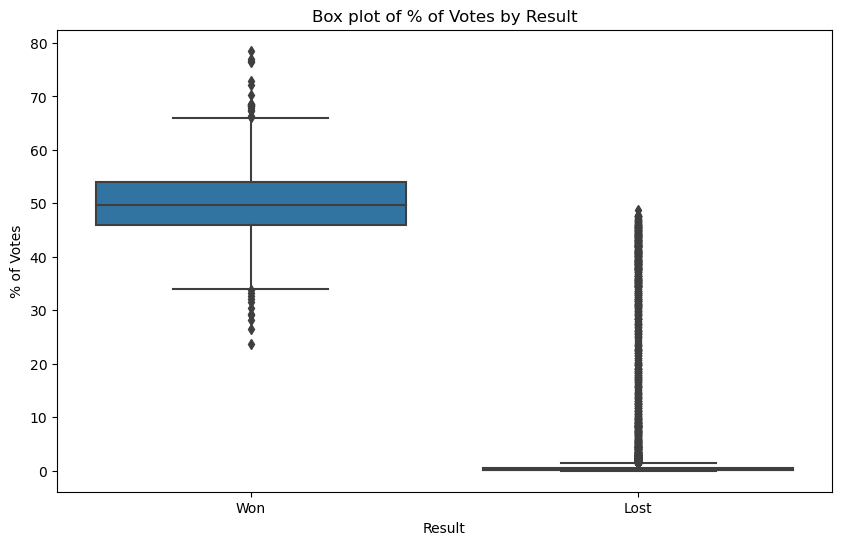

In [24]:
# Example: Box plot of % of Votes by Result
plt.figure(figsize=(10, 6))
sns.boxplot(x='Result', y='% of Votes', data=df)
plt.title('Box plot of % of Votes by Result')
plt.xlabel('Result')
plt.ylabel('% of Votes')
plt.show()



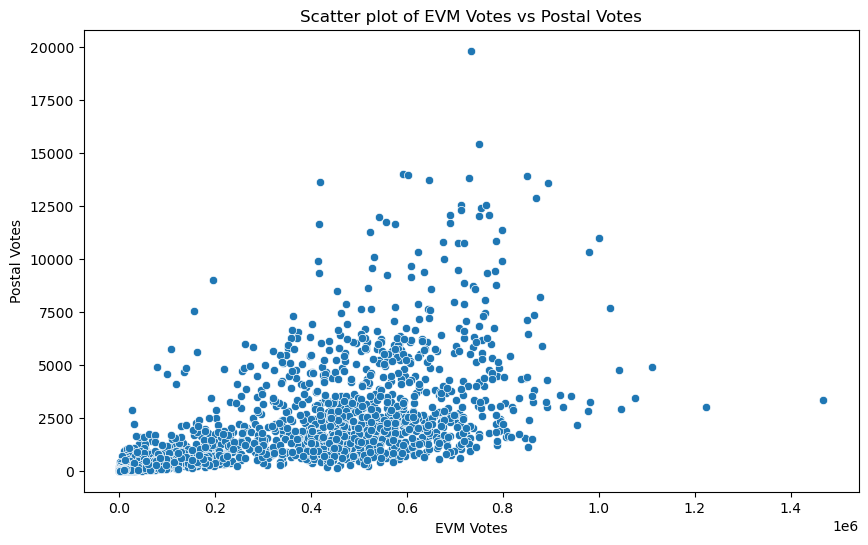

In [25]:
# Example: Scatter plot of EVM Votes vs Postal Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EVM Votes', y='Postal Votes', data=df)
plt.title('Scatter plot of EVM Votes vs Postal Votes')
plt.xlabel('EVM Votes')
plt.ylabel('Postal Votes')
plt.show()

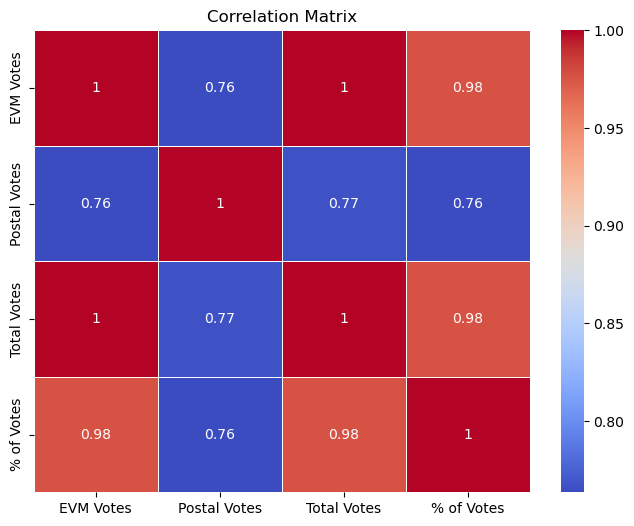

In [26]:
# Calculate correlation matrix
correlation_matrix = df[['EVM Votes', 'Postal Votes', 'Total Votes', '% of Votes']].corr()

# Display heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [45]:
# Group by 'State' and count the occurrences
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']
print(state_counts)

                                   State  Count
0                            Maharashtra   1169
1                             Tamil Nadu    989
2                          Uttar Pradesh    931
3                            West Bengal    549
4                              Telangana    542
5                                  Bihar    537
6                              Karnataka    502
7                         Andhra Pradesh    479
8                         Madhya Pradesh    398
9                                 Punjab    341
10                               Gujarat    291
11                             Rajasthan    291
12                             Jharkhand    258
13                               Haryana    233
14                          Chhattisgarh    231
15                                Odisha    228
16                                Kerala    214
17                          NCT OF Delhi    169
18                                 Assam    157
19                     Jammu and Kashmir

In [46]:
# Statewise Sum of votes
df[['State','Total Votes']].groupby('State').sum().sort_values(by='Total Votes', ascending=False)

,Total Votes
State,
Uttar Pradesh,87911642
West Bengal,60483687
Maharashtra,57179133
Tamil Nadu,43674048
Bihar,43448949
Karnataka,38793617
Madhya Pradesh,37940251
Andhra Pradesh,33729342
Rajasthan,33164877


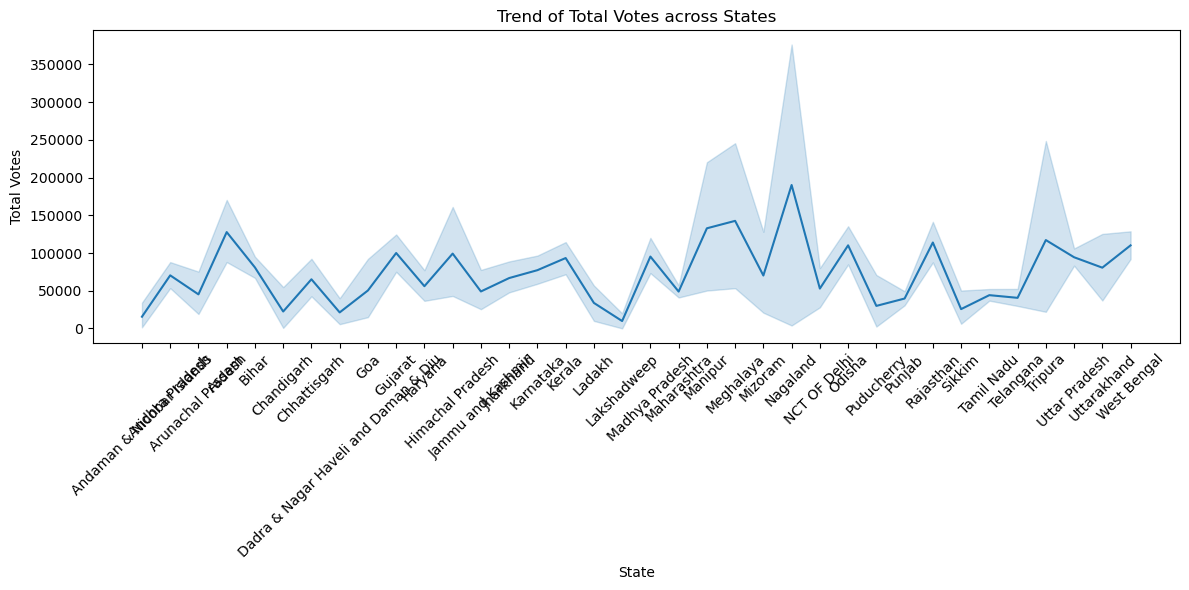

In [27]:
# Example: Trend of Total Votes across States
plt.figure(figsize=(12, 6))
sns.lineplot(x='State', y='Total Votes', data=df)
plt.title('Trend of Total Votes across States')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
df['% of Votes'] = (df['Total Votes'] / df['Total Votes'].sum()) * 100

top_parties = df.groupby('Party')['% of Votes'].sum().sort_values(ascending=False).head(10)

print(top_parties)

Party
Bharatiya Janata Party                   36.564503
Indian National Congress                 21.191015
Samajwadi Party                           4.578719
All India Trinamool Congress              4.371706
Independent                               2.765022
Yuvajana Sramika Rythu Congress Party     2.063340
Bahujan Samaj Party                       2.038203
Telugu Desam                              1.979547
Dravida Munnetra Kazhagam                 1.821409
Communist Party of India  (Marxist)       1.757545
Name: % of Votes, dtype: float64


In [63]:
pd.set_option('display.max_rows', None)
# Grouping by 'State', 'Party', and 'Result', and counting occurrences
grouped = df.groupby(['State', 'Party', 'Result']).size().unstack()

# Sorting by the number of 'Won' results in descending order
sorted_df = grouped.sort_values(by='Won', ascending=False)

# Displaying the sorted DataFrame
sorted_df

Result                                                                                    Lost  \
State                                Party                                                       
Uttar Pradesh                        Samajwadi Party                                      25.0   
                                     Bharatiya Janata Party                               42.0   
Madhya Pradesh                       Bharatiya Janata Party                                NaN   
West Bengal                          All India Trinamool Congress                         13.0   
Gujarat                              Bharatiya Janata Party                                1.0   
Tamil Nadu                           Dravida Munnetra Kazhagam                             NaN   
Odisha                               Bharatiya Janata Party                                1.0   
Karnataka                            Bharatiya Janata Party                                8.0   
Andhra Pradesh                       Telugu Desam                                          1.0   
Kerala                               Indian National Congress                              2.0   
Rajasthan                            Bharatiya Janata Party                               11.0   
Maharashtra                          Indian National Congress                              4.0   
West Bengal                          Bharatiya Janata Party                               30.0   
Bihar                                Janata Dal  (United)                                  4.0   
                                     Bharatiya Janata Party                                5.0   
Chhattisgarh                         Bharatiya Janata Party                                1.0   
Karnataka                            Indian National Congress                             19.0   
Assam                                Bharatiya Janata Party                                2.0   
Maharashtra                          Bharatiya Janata Party                               19.0   
Tamil Nadu                           Indian National Congress                              NaN   
Maharashtra                          Shiv Sena (Uddhav Balasaheb Thackrey)                12.0   
Jharkhand                            Bharatiya Janata Party                                5.0   
Maharashtra                          Nationalist Congress Party – Sharadchandra Pawar      2.0   
Telangana                            Bharatiya Janata Party                                9.0   
                                     Indian National Congress                              9.0   
Rajasthan                            Indian National Congress                             15.0   
Maharashtra                          Shiv Sena                                             8.0   
NCT OF Delhi                         Bharatiya Janata Party                                NaN   
Punjab                               Indian National Congress                              6.0   
Uttar Pradesh                        Indian National Congress                             11.0   
Bihar                                Lok Janshakti Party(Ram Vilas)                        NaN   
Uttarakhand                          Bharatiya Janata Party                                NaN   
Haryana                              Indian National Congress                              4.0   
                                     Bharatiya Janata Party                                5.0   
Himachal Pradesh                     Bharatiya Janata Party                                NaN   
Bihar                                Rashtriya Janata Dal                                 19.0   
Andhra Pradesh                       Yuvajana Sramika Rythu Congress Party                21.0   
Assam                                Indian National Congress                             10.0   
Andhra Pradesh                       Bharatiya Janata Party                     